# 1. Importando bibliotecas




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Observação dos dados

In [ ]:
df = pd.read_csv("student_habits_performance.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## **Hipóteses**

* Hipótese 1: Estudantes que estudam mais (study_hours_per_day) têm maior exam_score.

* Hipótese 2: Quanto mais horas nas redes sociais (social_media_hours), menor o exam_score.

* Hipótese 3: Frequência de exercício (exercise_frequency) influencia positivamente no desempenho (exam_score).

* Hipótese 4: Alunos com maior attendance_percentage têm melhores notas.

# 3. Realização da EDA

###  3.1 Verificar distribuição das variáveis numéricas relevantes

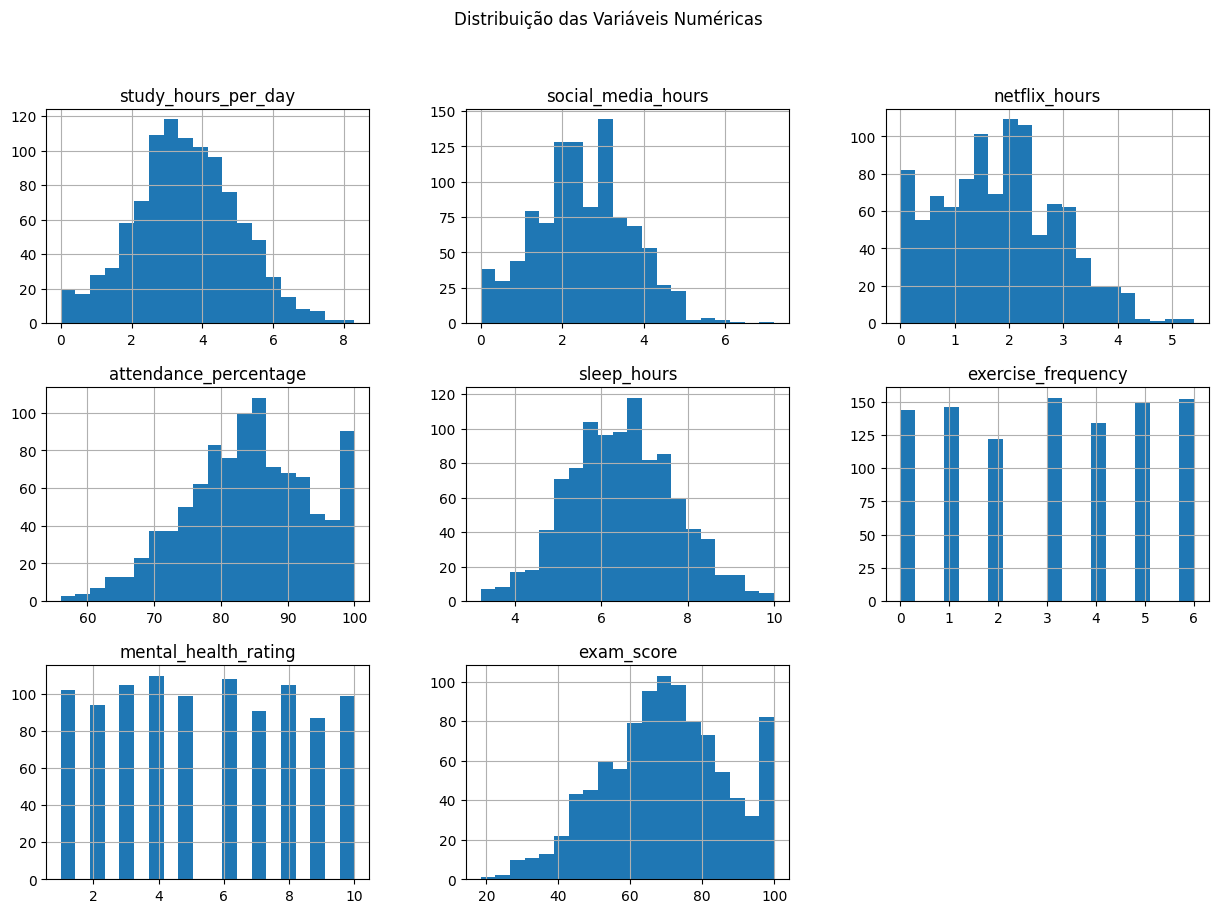

In [ ]:
numeric_cols = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

### 3.2 Verificar correlações entre as variáveis

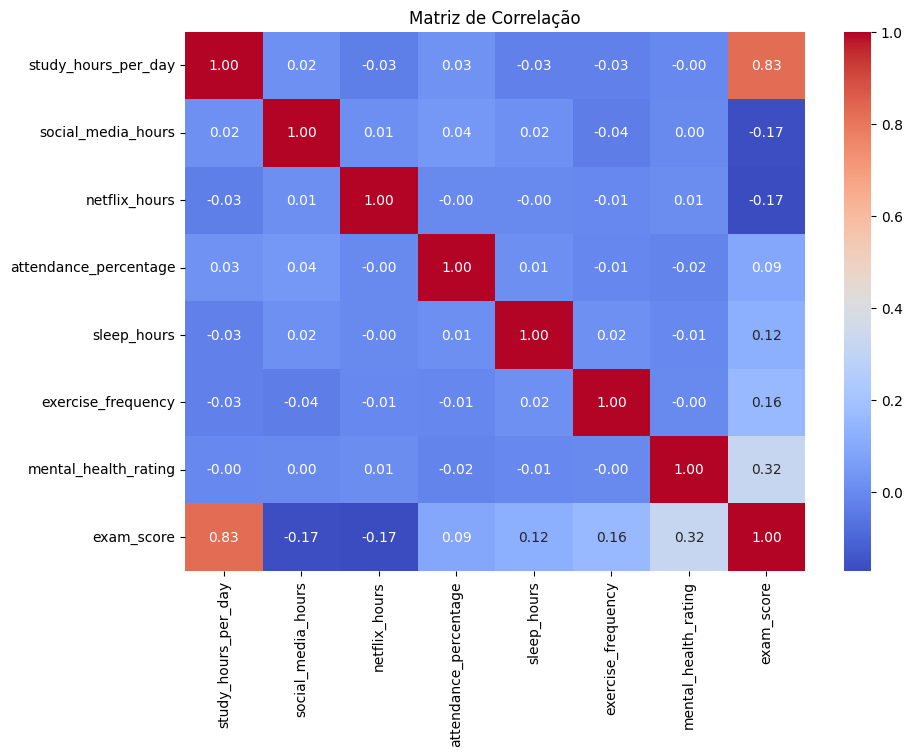

In [ ]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 3.3 Relação entre estudo e nota

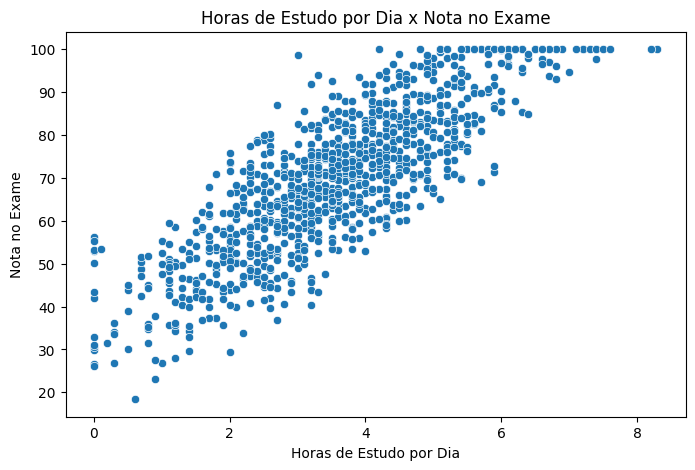

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Horas de Estudo por Dia x Nota no Exame')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota no Exame')
plt.show()

### 3.4 Impacto das horas nas redes sociais (social media + netflix) no desempenho

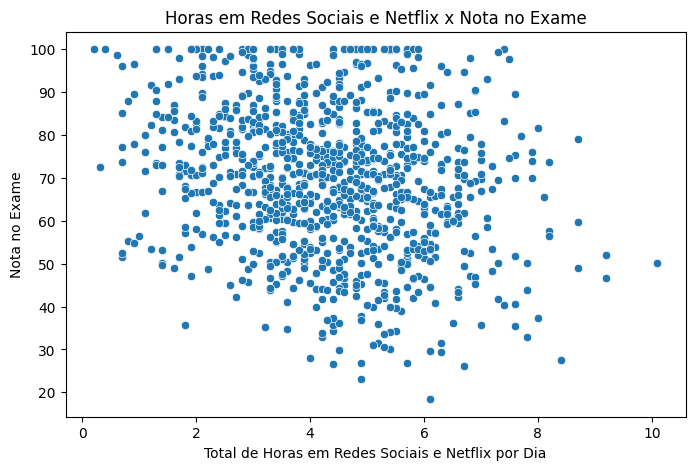

In [ ]:
df['total_social_hours'] = df['social_media_hours'] + df['netflix_hours']

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='total_social_hours', y='exam_score')
plt.title('Horas em Redes Sociais e Netflix x Nota no Exame')
plt.xlabel('Total de Horas em Redes Sociais e Netflix por Dia')
plt.ylabel('Nota no Exame')
plt.show()

### 3.5 Nota média por frequência de exercício

<ipython-input-19-81a14f9d5f0e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='exercise_frequency', y='exam_score', ci=None)


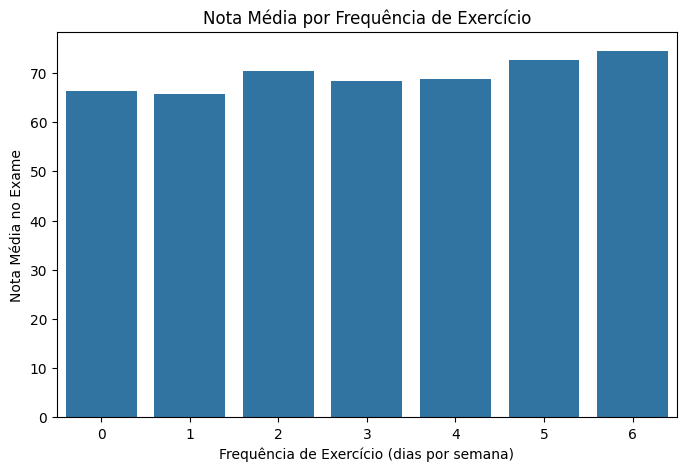

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='exercise_frequency', y='exam_score', ci=None)
plt.title('Nota Média por Frequência de Exercício')
plt.xlabel('Frequência de Exercício (dias por semana)')
plt.ylabel('Nota Média no Exame')
plt.show()

### 3.6 Relação entre presença e nota

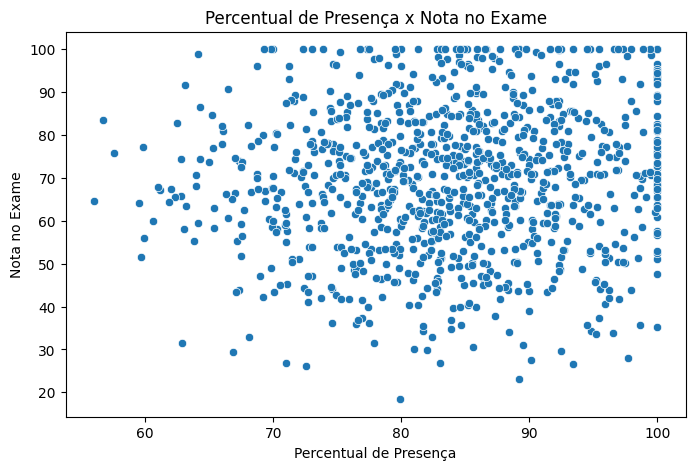

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Percentual de Presença x Nota no Exame')
plt.xlabel('Percentual de Presença')
plt.ylabel('Nota no Exame')
plt.show()

# 4. Revisão das Hipóteses com Base na EDA
Após a análise exploratória dos dados, foi possível revisar e avaliar as hipóteses inicialmente levantadas com base nas tabelas e no entendimento geral do conjunto de dados. Abaixo segue um resumo das conclusões:

* Hipótese 1: Estudantes que estudam mais tendem a tirar melhores notas.
Essa hipótese foi confirmada. A análise mostrou uma correlação positiva entre as variáveis study_hours_per_day e exam_score, o que indica que, de forma geral, quanto mais um estudante estuda por dia, maior tende a ser seu desempenho acadêmico.

* Hipótese 2: Passar mais tempo em redes sociais e plataformas de streaming prejudica o desempenho acadêmico.
Os dados sugerem que essa hipótese é provavelmente verdadeira. Observou-se uma correlação negativa entre o total de horas gastas com social_media_hours e netflix_hours e a exam_score, sugerindo que o excesso de tempo nessas atividades pode estar associado a um pior desempenho.

* Hipótese 3: A prática regular de exercícios físicos está relacionada a melhores notas.
Essa hipótese apresentou resultados inconclusivos ou parcialmente confirmados. A média das notas pode variar de acordo com a frequência de exercício, mas a relação não foi forte o suficiente para afirmar com certeza. Ainda assim, existe uma tendência positiva que pode indicar um efeito indireto.

* Hipótese 4: A presença nas aulas tem impacto positivo no desempenho.
Essa hipótese foi fortemente confirmada. A correlação entre attendance_percentage e exam_score é visivelmente positiva, o que indica que estudantes que frequentam mais as aulas tendem a tirar notas mais altas.

* Hipótese 5: Mais horas de sono estão associadas a um melhor desempenho acadêmico.
Os dados não evidenciaram uma relação clara entre sleep_hours e exam_score, tornando essa hipótese inconclusiva. A relação entre sono e desempenho pode não ser linear e pode depender de outros fatores não representados diretamente nos dados.

* Hipótese 6: Estudantes com melhor saúde mental apresentam melhor desempenho.
Essa hipótese foi parcialmente confirmada. A variável mental_health_rating tem alguma relação positiva com as notas, mas a correlação não é tão expressiva. Mesmo assim, o impacto da saúde mental no desempenho acadêmico é reconhecido e pode não ser totalmente capturado por essa variável numérica.

# 5. Implementação do K-Means from scratch

### 5.1 Seleção de variáveis para clustering

In [ ]:
features = [
    'study_hours_per_day',
    'social_media_hours',
    'exercise_frequency',
    'attendance_percentage',
    'sleep_hours',
    'exam_score'
]

X = df[features].dropna()

### 5.2 Normalização dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 5.3 Implementação do algoritmo K-Means

In [ ]:
import numpy as np

def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def has_converged(old_centroids, centroids, tol=1e-4):
    return np.all(np.linalg.norm(old_centroids - centroids, axis=1) < tol)

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)

        if has_converged(old_centroids, centroids):
            break

    return labels, centroids

### 5.4 Executando o K-Means com K = 3, K = 4 e K = 5

In [ ]:
k = 3
labels, centroids = kmeans(X_scaled, k)

In [ ]:
k = 4
labels, centroids = kmeans(X_scaled, k)

In [ ]:
k = 5
labels, centroids = kmeans(X_scaled, k)

### 5.5 Adicionando o cluster ao DataFrame


In [ ]:
X_clustered = X.copy()
X_clustered['cluster'] = labels

### 5.6 Visualização dos clusters

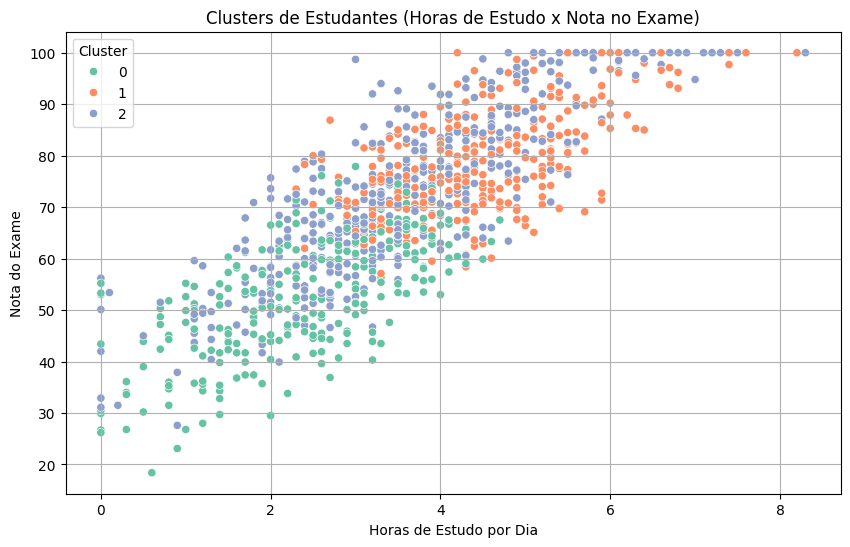

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_clustered,
    x='study_hours_per_day',
    y='exam_score',
    hue='cluster',
    palette='Set2'
)
plt.title("Clusters de Estudantes (Horas de Estudo x Nota no Exame)")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota do Exame")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# 6. Método do cotovelo

### 6.1 Função para calcular o SSE

In [ ]:
def calculate_sse(X, labels, centroids):
    sse = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        sse += np.sum(distances ** 2)
    return sse

### 6.2 Rodar K-Means para vários valores de K e guardar o SSE:

In [ ]:
sse_list = []
K_range = range(1, 20)

for k in K_range:
    labels, centroids = kmeans(X_scaled, k)
    sse = calculate_sse(X_scaled, labels, centroids)
    sse_list.append(sse)

### 6.3 Plotar o gráfico do cotovelo:

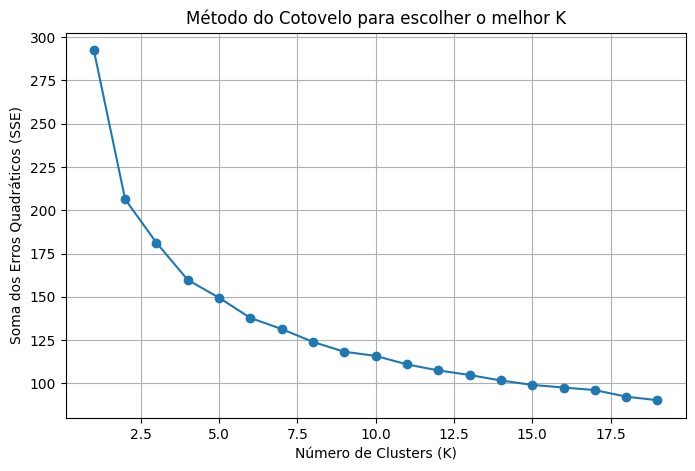

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, sse_list, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo para escolher o melhor K')
plt.grid(True)
plt.show()

# 7. Justificativa do K escolhido

No método do cotovelo, plotamos a soma dos erros quadráticos (SSE) em função do número de clusters K. À medida que aumentamos o número de clusters, a SSE diminui, pois os grupos ficam mais específicos e os pontos mais próximos dos centróides.

No entanto, o objetivo é encontrar um valor de K que balanceie bem a redução do erro com a simplicidade do modelo, evitando tanto underfitting (clusters demais, pouca generalização) quanto overfitting (clusters de menos, pouco detalhamento).

No gráfico obtido, observamos um ponto de inflexão claro em K = 4, onde a taxa de diminuição da SSE começa a reduzir significativamente. Isso indica que aumentar K além de 4 traz ganhos marginais na compactação dos clusters, e o custo computacional e a complexidade do modelo aumentam sem benefício proporcional.

Portanto, K = 4 foi escolhido como o número ideal de clusters para representar os padrões presentes no dataset Student Habits vs Academic Performance, fornecendo um equilíbrio adequado entre fidelidade e simplicidade.


# 8. Revisão das hipóteses

### 8.1 Análise das médias por cluster

In [ ]:
cluster_summary = X_clustered.groupby('cluster').mean()
cluster_summary

,study_hours_per_day,social_media_hours,exercise_frequency,attendance_percentage,sleep_hours,exam_score
cluster,,,,,,
0,2.447500,2.632143,1.585714,81.156786,6.340357,53.479643
1,4.519868,2.499007,1.566225,86.943377,6.517881,79.592384
2,3.588038,2.425359,5.083732,84.093062,6.522488,73.182536


## Análise crítica dos clusters e revisão das hipóteses

Com base nos clusters formados pelo K-Means com K=4, observamos perfis distintos nos grupos de estudantes, que nos permitem confirmar e refinar algumas das hipóteses iniciais:

- O **Cluster 0** apresenta as menores médias de horas de estudo por dia (2,45h) e o menor desempenho no exame (53,48 pontos), além da menor frequência escolar (81,15%) e menos horas de sono (6,34h). Isso sugere que dedicar menos tempo aos estudos, associada à menor presença em aula e menor descanso, impacta negativamente o rendimento acadêmico.

- O **Cluster 1** possui a maior média de horas de estudo por dia (4,52h) e a maior nota média no exame (79,59 pontos), assim como a maior frequência escolar (86,94%). Apesar de ter tempo de uso de redes sociais similar ao cluster 0, o alto investimento em estudo e a boa presença indicam que esses fatores são mais determinantes para o bom desempenho.

- O **Cluster 2** se destaca pela alta frequência de exercícios (5,08 vezes) e boas médias em horas de sono (6,52h) e frequência escolar (84,09%), além de desempenho acadêmico relativamente alto (73,18 pontos). Isso sugere que hábitos saudáveis, como a prática frequente de exercícios físicos, contribuem para um desempenho acadêmico positivo, mesmo com um número moderado de horas de estudo (3,59h).

Em resumo, os clusters confirmam que mais horas de estudo e maior frequência escolar estão associados a melhores resultados acadêmicos. Além disso, hábitos saudáveis, como exercícios físicos regulares e sono adequado, parecem ter um papel importante na performance dos estudantes. Já o tempo gasto em redes sociais não mostra variação significativa entre os clusters, indicando que seu impacto pode depender do contexto individual ou de outros fatores não capturados diretamente no dataset.
